In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [ ]:
df_1 = pd.read_csv("..\..\!Processed\heat_data_fig_1_python.csv").set_index("Country")
df_2 = pd.read_csv("..\..\!Processed\heat_data_fig_2_python.csv").set_index("Country")
df_co2 = pd.read_csv("..\..\!Emissions\emissions_python.csv").set_index("Country").dropna(axis=0, how='all')
df_co2
df_2

In [ ]:
font= 'Microsoft Yi Baiti'

text_props = {'fontsize': 25, 'fontname':font}
title_props =  {'fontsize': 35, 'fontname':font, 'verticalalignment':'baseline'} 
legend_pie_props = {'size':22, 'family':font}
legend_bar_props = {'size':25, 'family':font}
matplotlib.rcParams['font.family'] = font
matplotlib.rcParams["figure.facecolor"] = "w"
alpha_set = 0.8
face_color = "white"
pie_size = (14,14)
bar_size = (24,12)
bar_font = 30
text_offset = 7.5

RE_explode = [0,0,0,0,0.1,0.1,0.1,0.1]

FILEPATH = "Exported_new"

In [ ]:

gas = '#8c564b'
oil = '#7f7f7f'
other_fossils = '#c7c7c7'
heat_pumps = '#c5b0d5'
direct_re = '#2ca02c'
district_heat = '#d62728'
electricity = '#1f77b4'
non_re_elec = '#ffbb78'
re_elec = '#98df8a'
re_DHC = '#d62728'
ambient = '#17becf'


colors_1 = [gas, oil, other_fossils, heat_pumps, direct_re, district_heat, electricity]
colors_2 = [gas, oil, other_fossils, non_re_elec, re_elec, direct_re, re_DHC, ambient]
colors_e = ['#ff7f0e', '#7f7f7f', '#9467bd']

# old HEX for re_DHC --> '#9edae5'

In [ ]:

colors = sns.color_palette("tab20")
palette = sns.color_palette("tab20", 20).as_hex()
print(palette)
palette

In [ ]:
cmap = matplotlib.cm.get_cmap('tab20')
for i in range(cmap.N):
    rgba = cmap(i)
    print(f"Hex: {matplotlib.colors.rgb2hex(rgba)}")

### COUNTRY PIE CHARTS

In [ ]:
labels_1 = df_1.columns
labels_2 = df_2.columns
plot_1 = [df_1, colors_1, labels_1, "What is used to heat in ", "fig_1"]
plot_2 = [df_2, colors_2, labels_2, "How clean is the heat in ", "fig_2"]

In [ ]:
df_co2

In [49]:
def plot_country(country, df, colors, labels, title, name):
    fig = plt.figure(figsize = pie_size)
    plt.pie(df.loc[country], colors=colors, startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 1 else  '', textprops=text_props, wedgeprops={'alpha':alpha_set, "edgecolor":"black"})
    plt.title(title+f"{country}?", fontdict=title_props, y=0.95)
    plt.legend(labels=labels, prop=legend_pie_props, loc = 8, ncol=3, edgecolor='white', framealpha=0)

    centre_circle = plt.Circle((0,0),0.70,fc=face_color,edgecolor='black')
    ax = fig.gca()
    ax.add_artist(centre_circle)

    plt.tight_layout()
    plt.savefig(f"{FILEPATH}/{country}_{name}")
    plt.show()

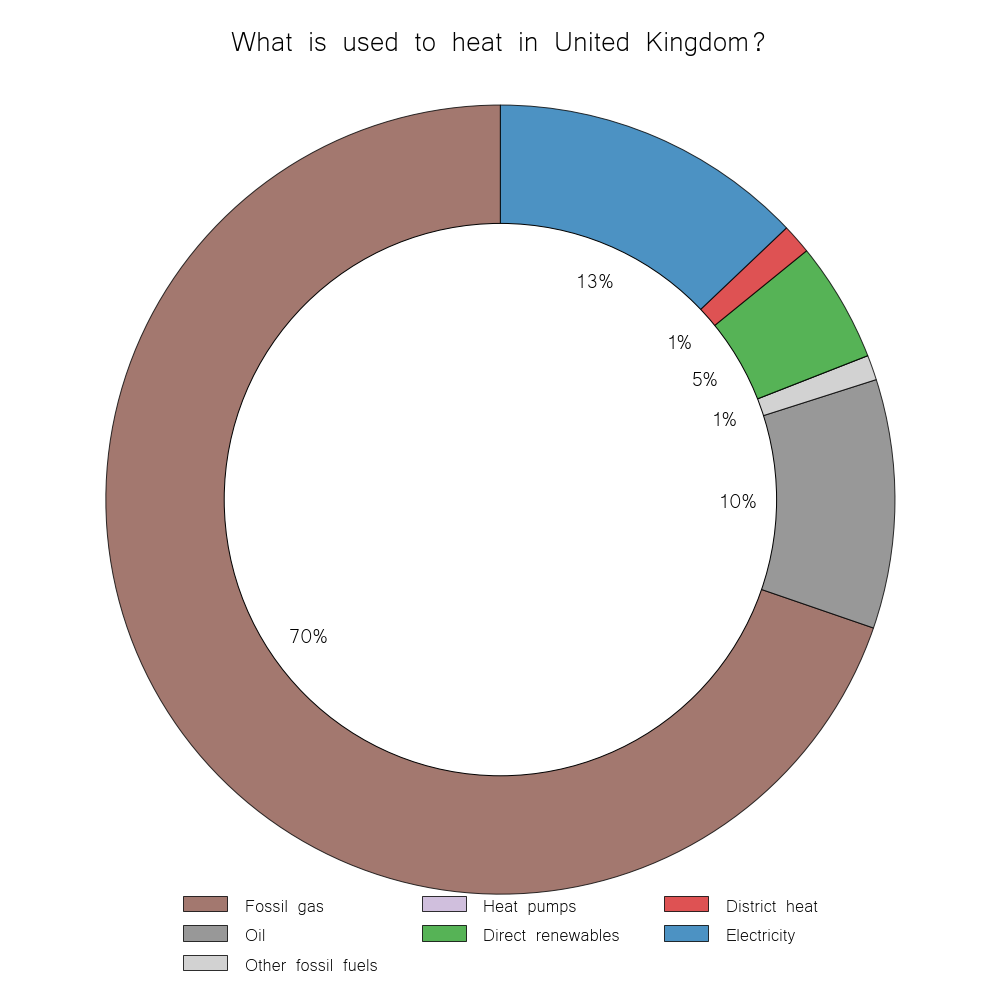

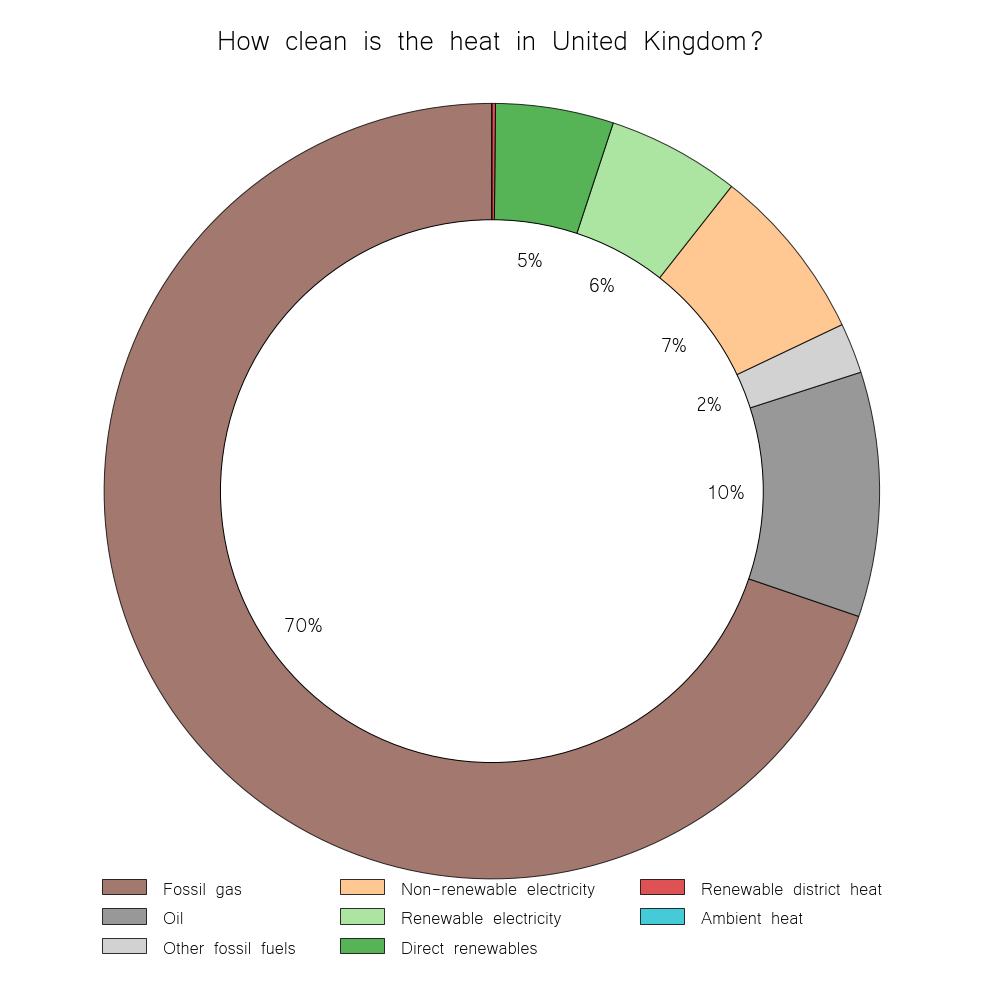

In [50]:
""" TESTING THE PLOTS """

#plot_country("United Kingdom", *plot_1)
#plot_country("United Kingdom", *plot_2)

In [ ]:
def plot_all_figs():
    for country in df_1.index:
        plot_country(country, *plot_1)

    for country in df_2.index:
        plot_country(country, *plot_2)

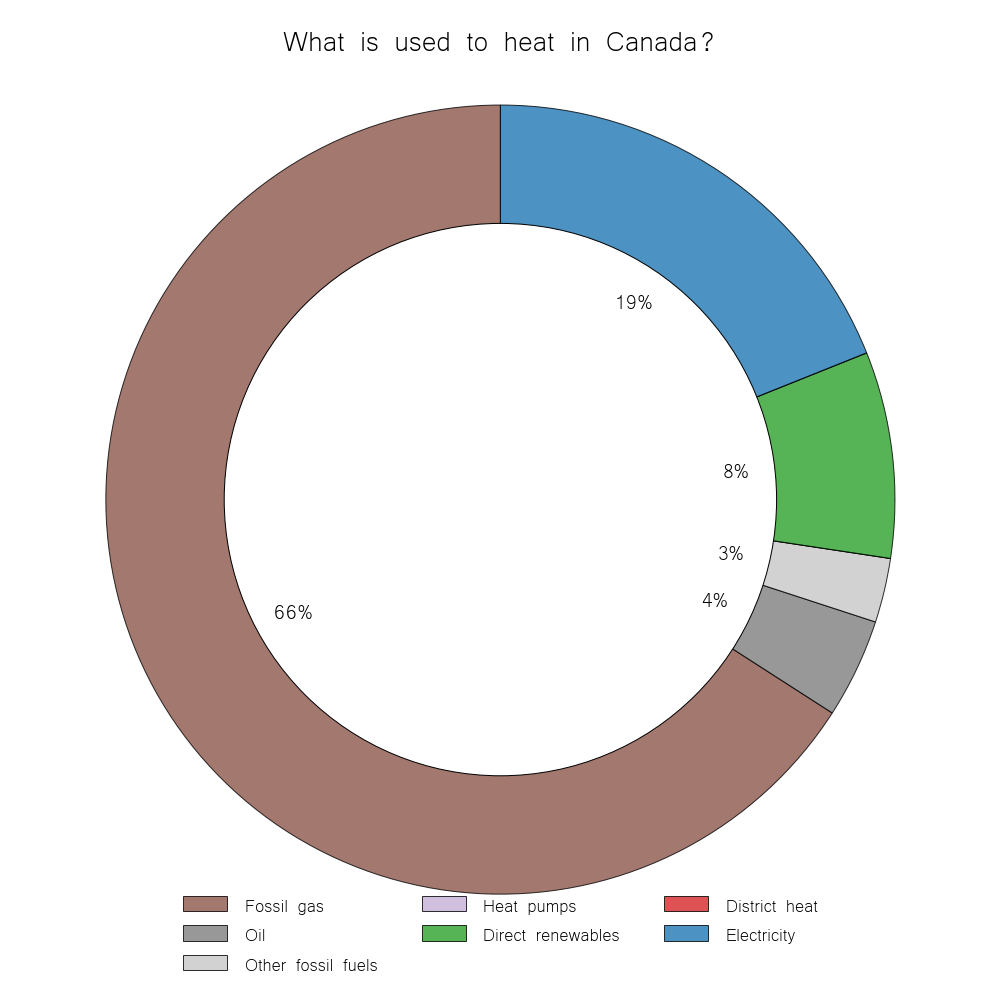

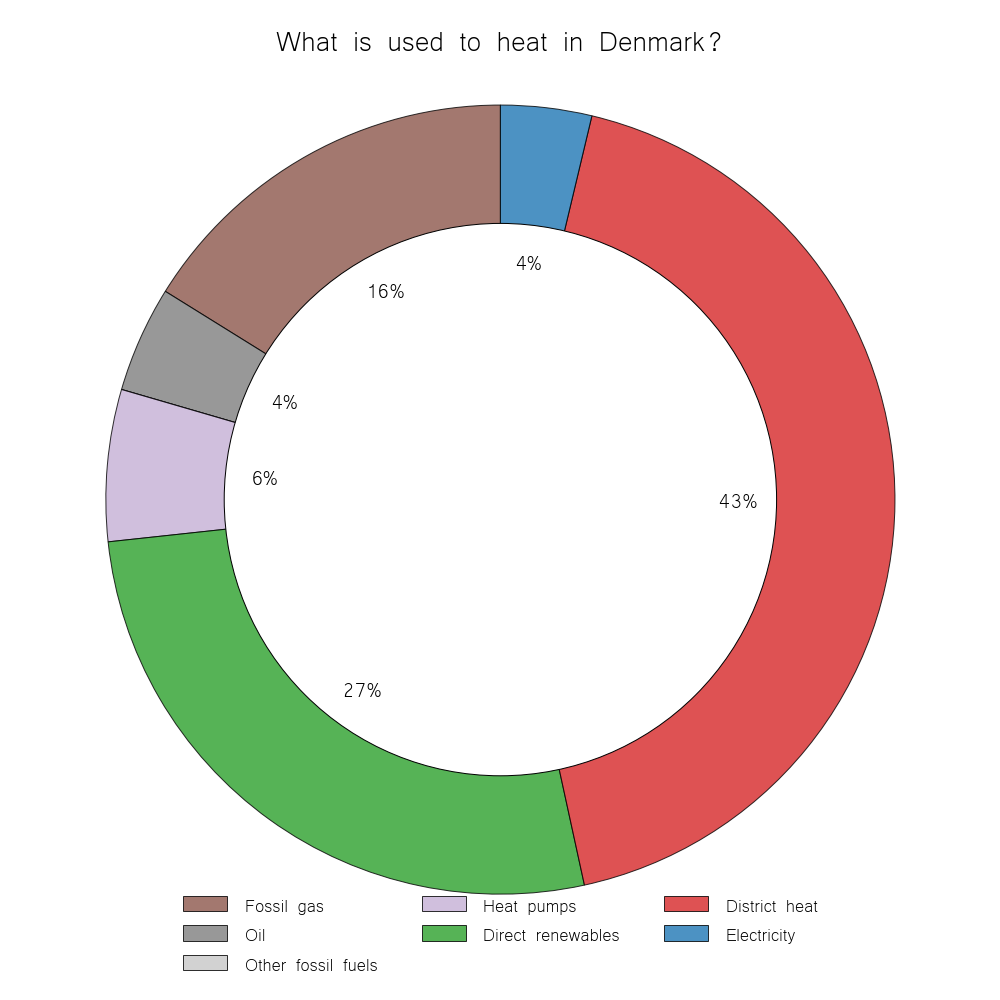

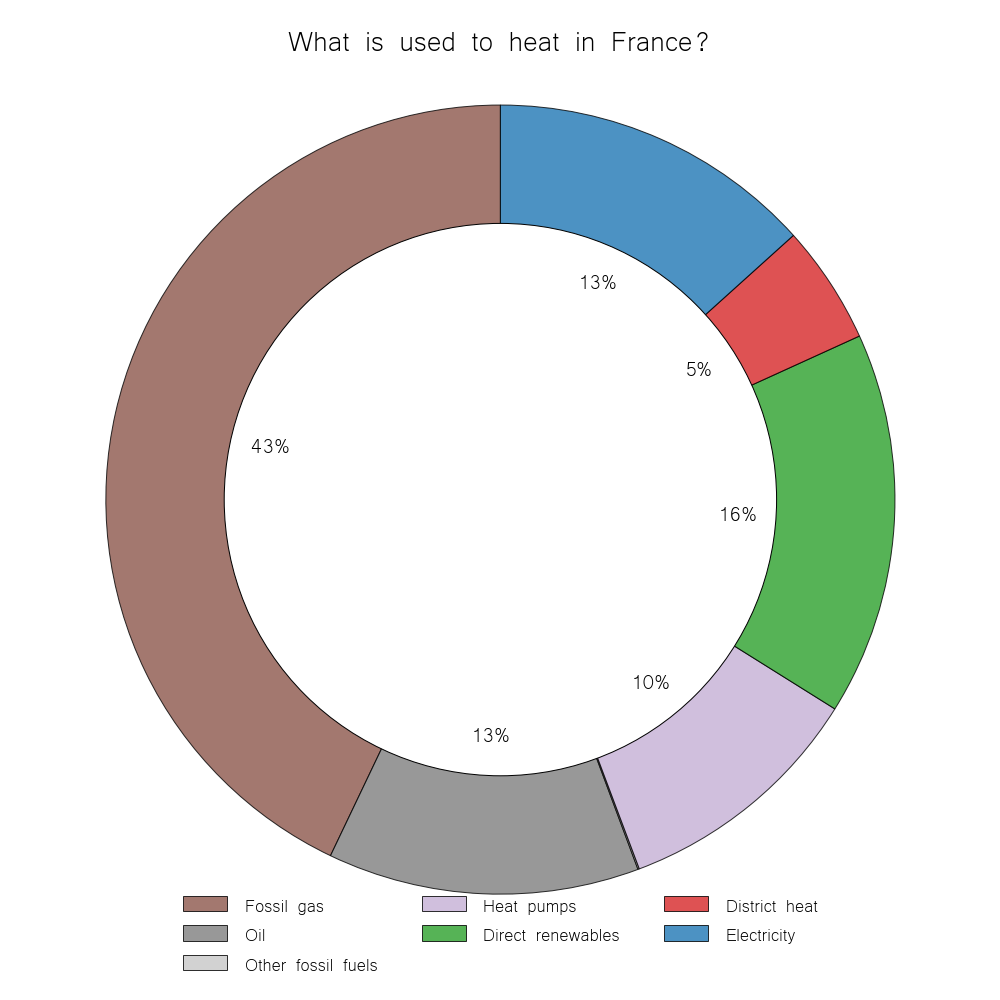

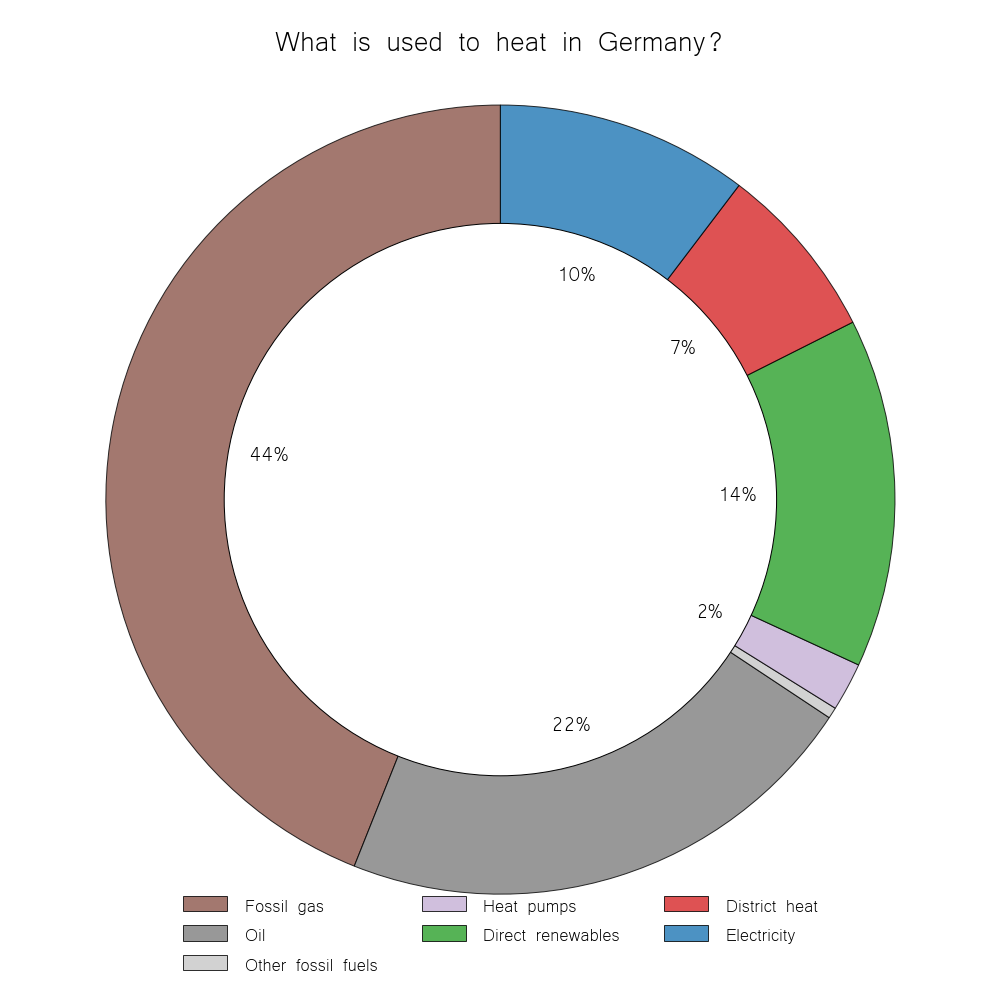

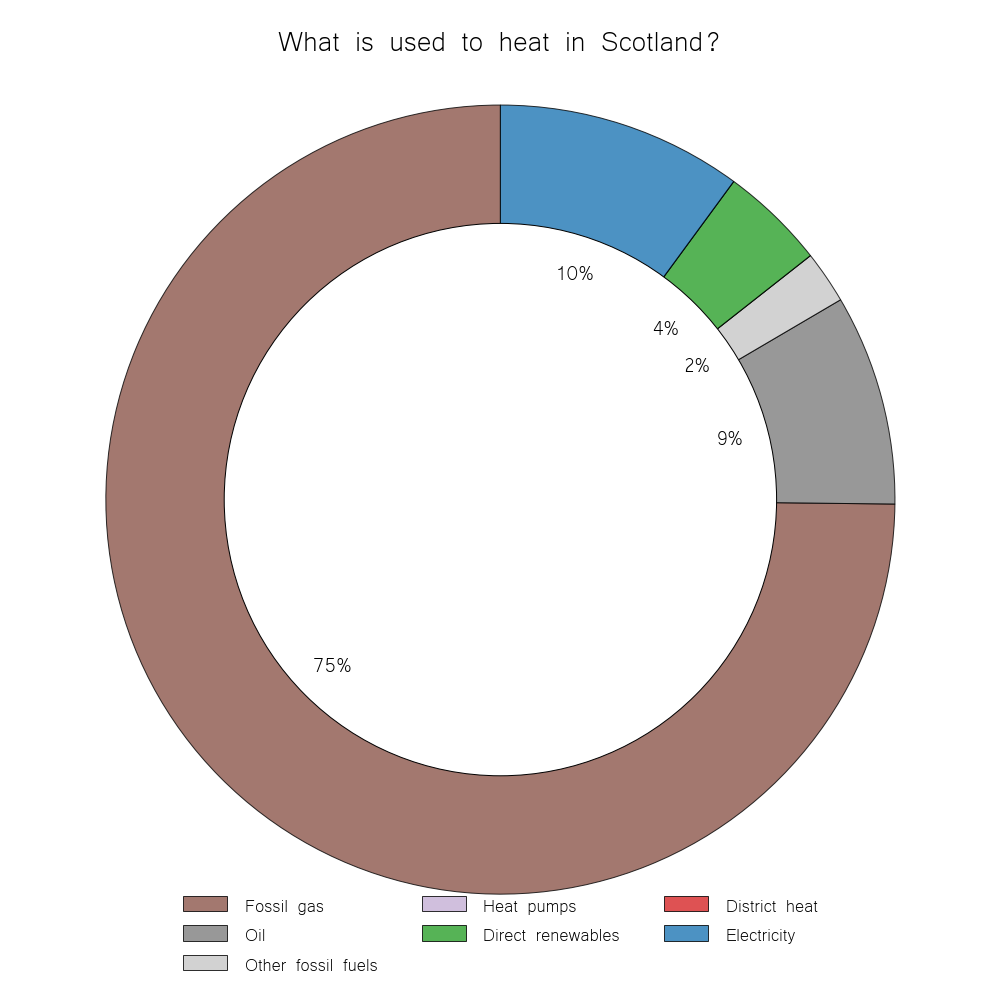

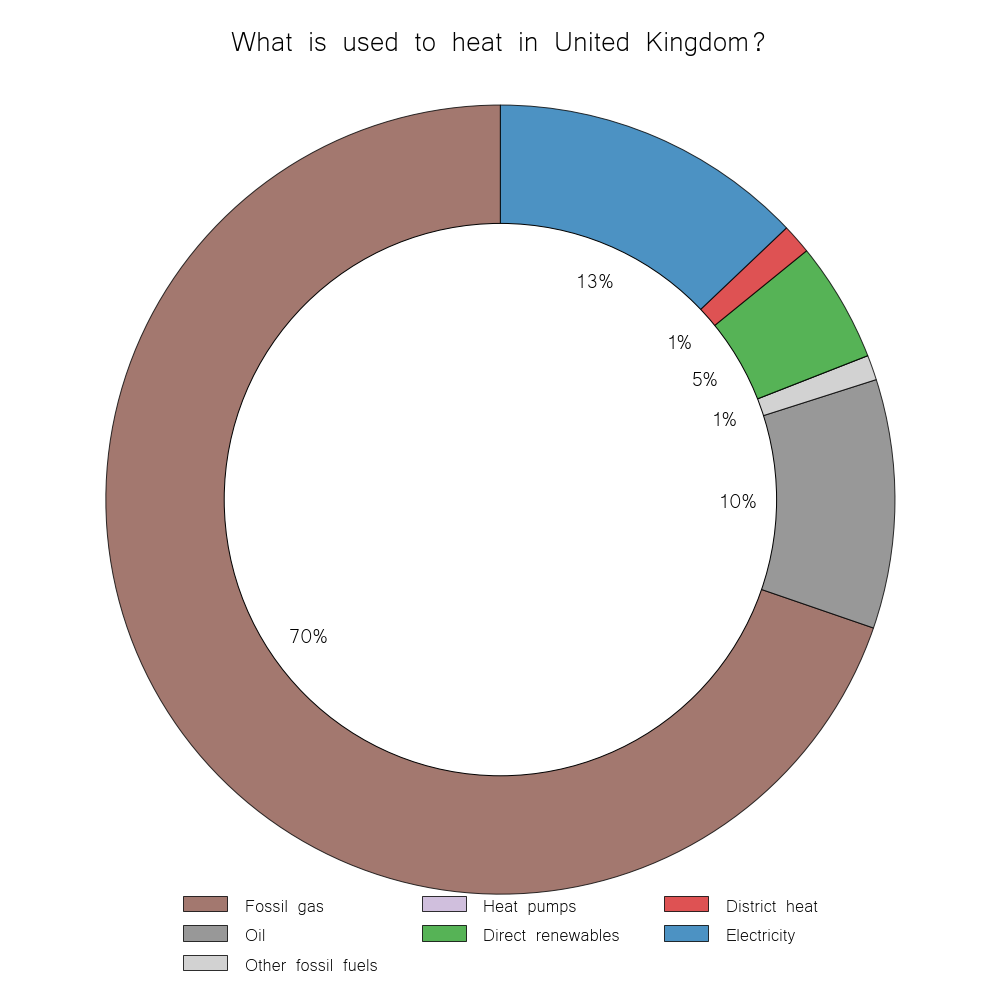

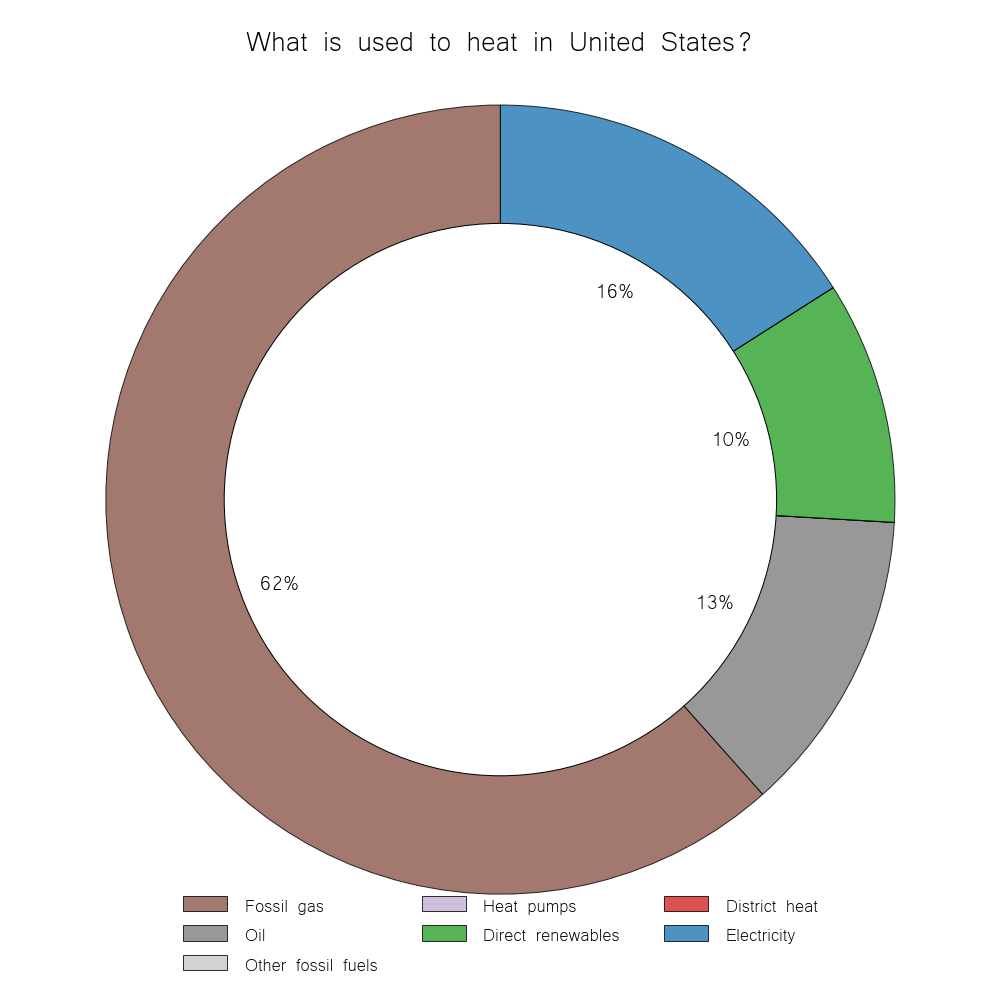

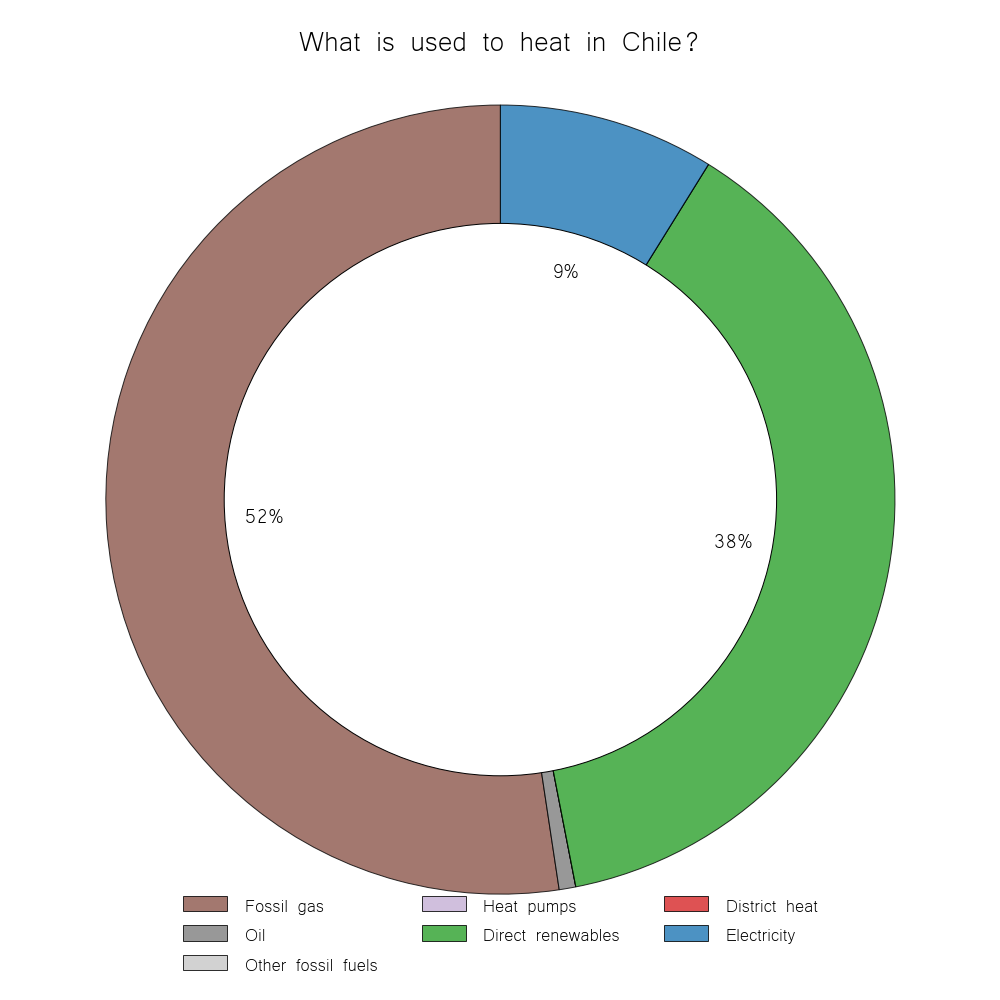

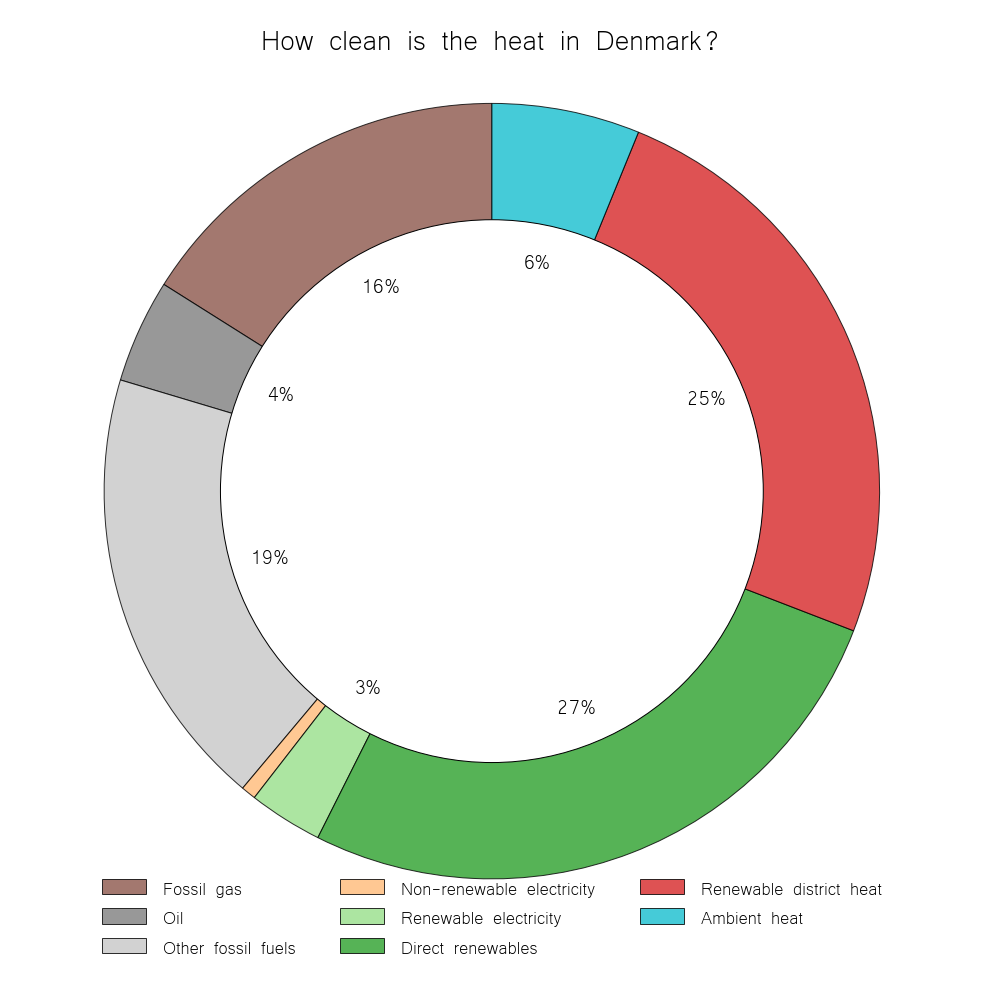

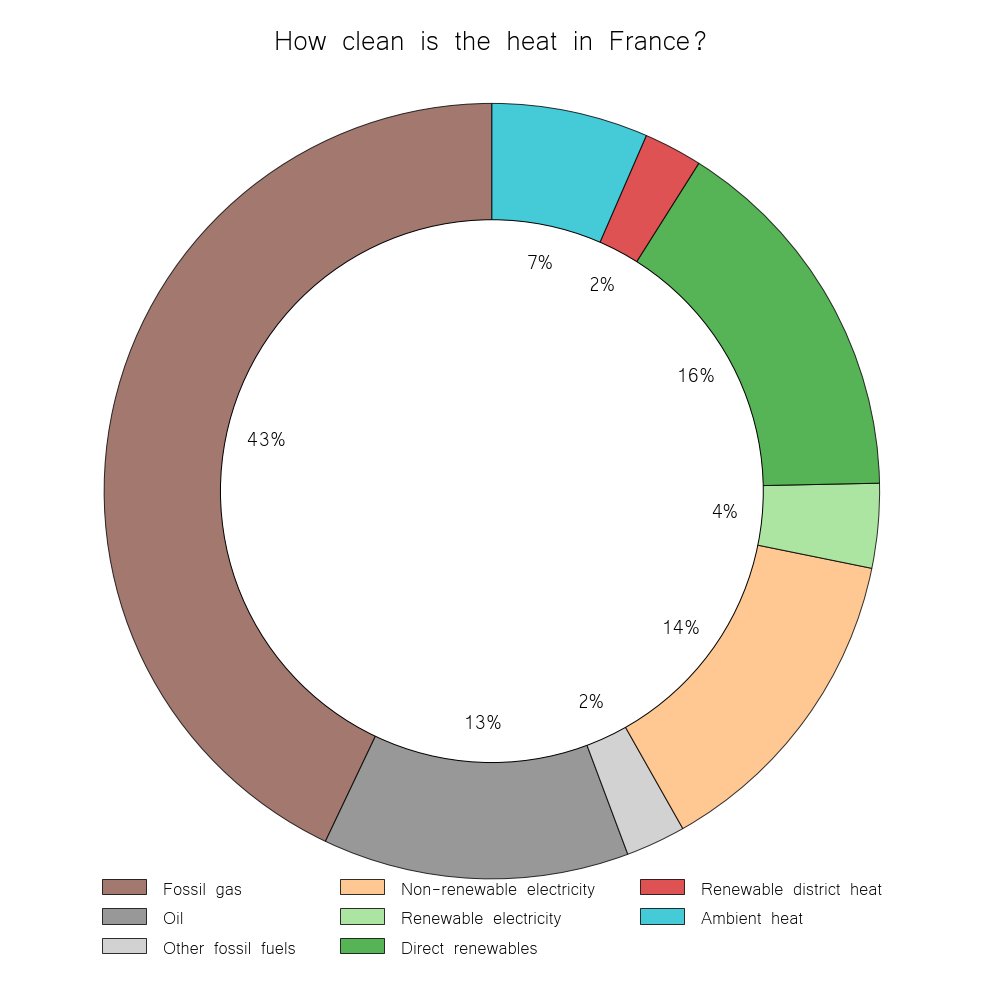

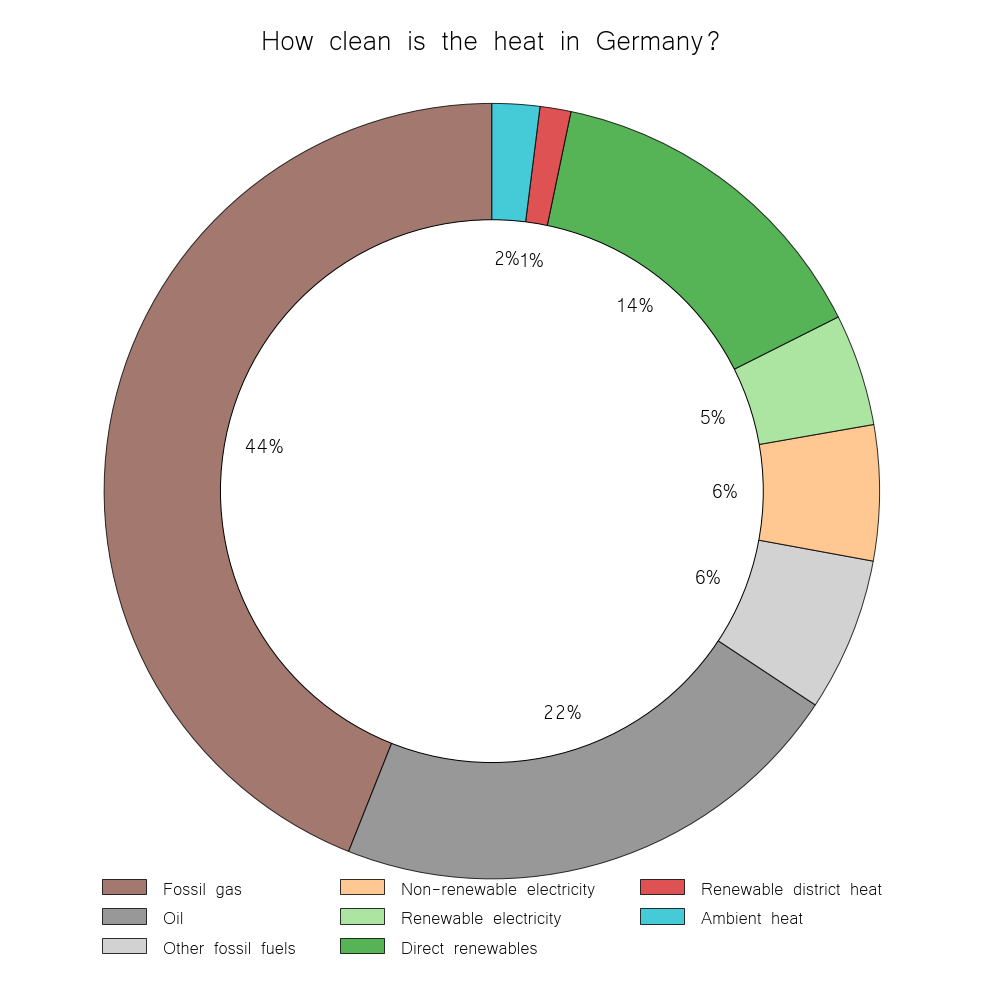

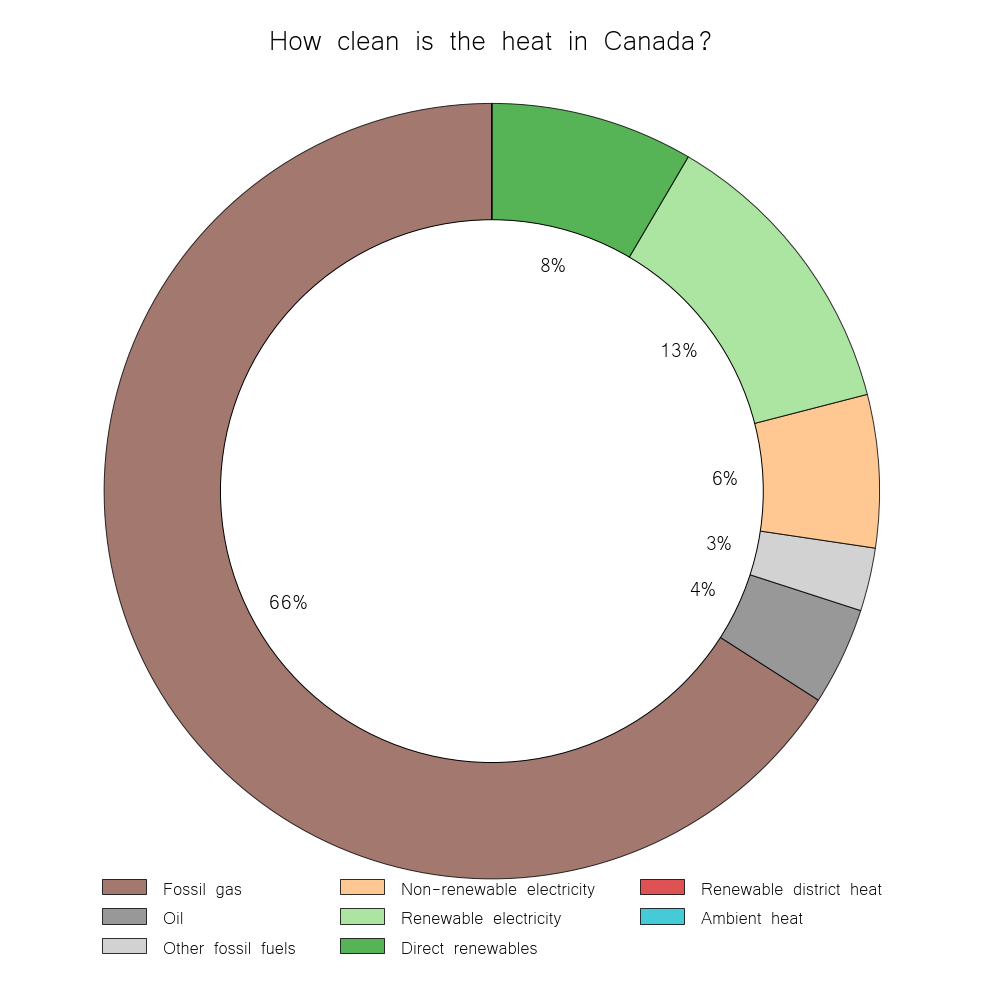

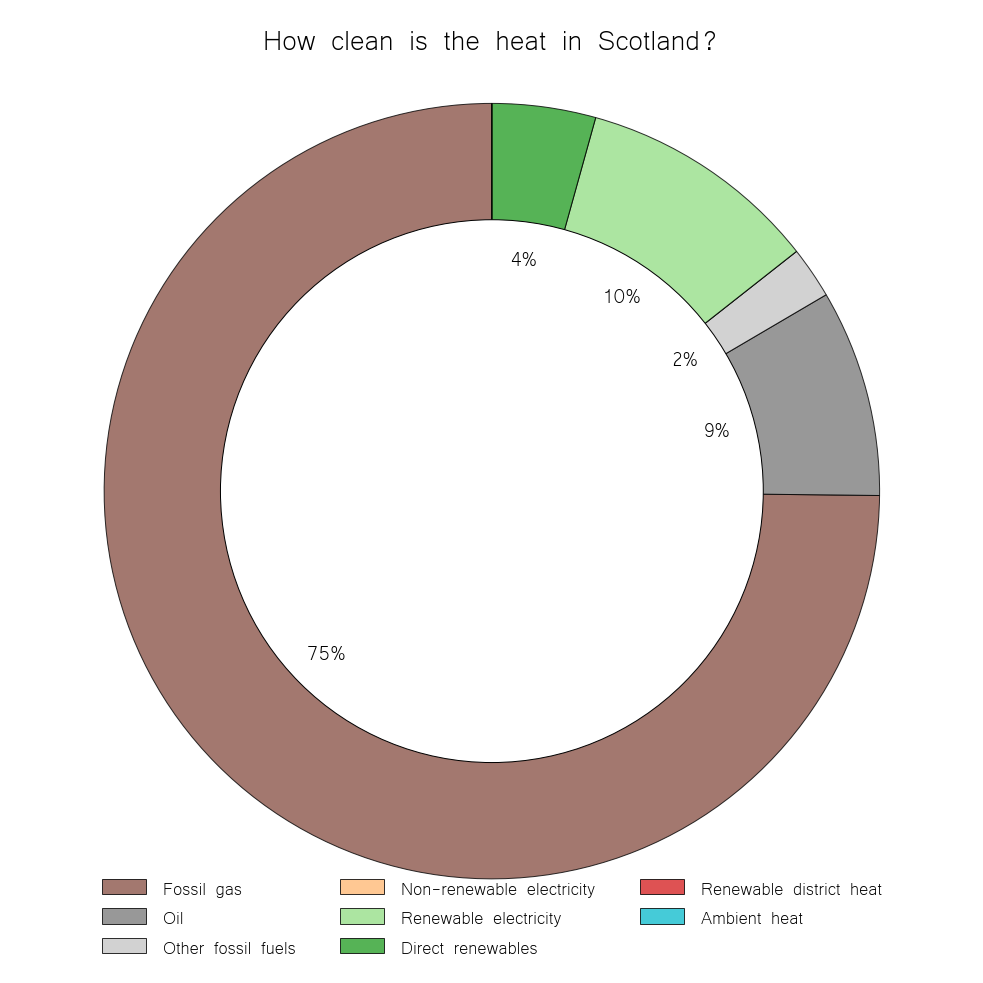

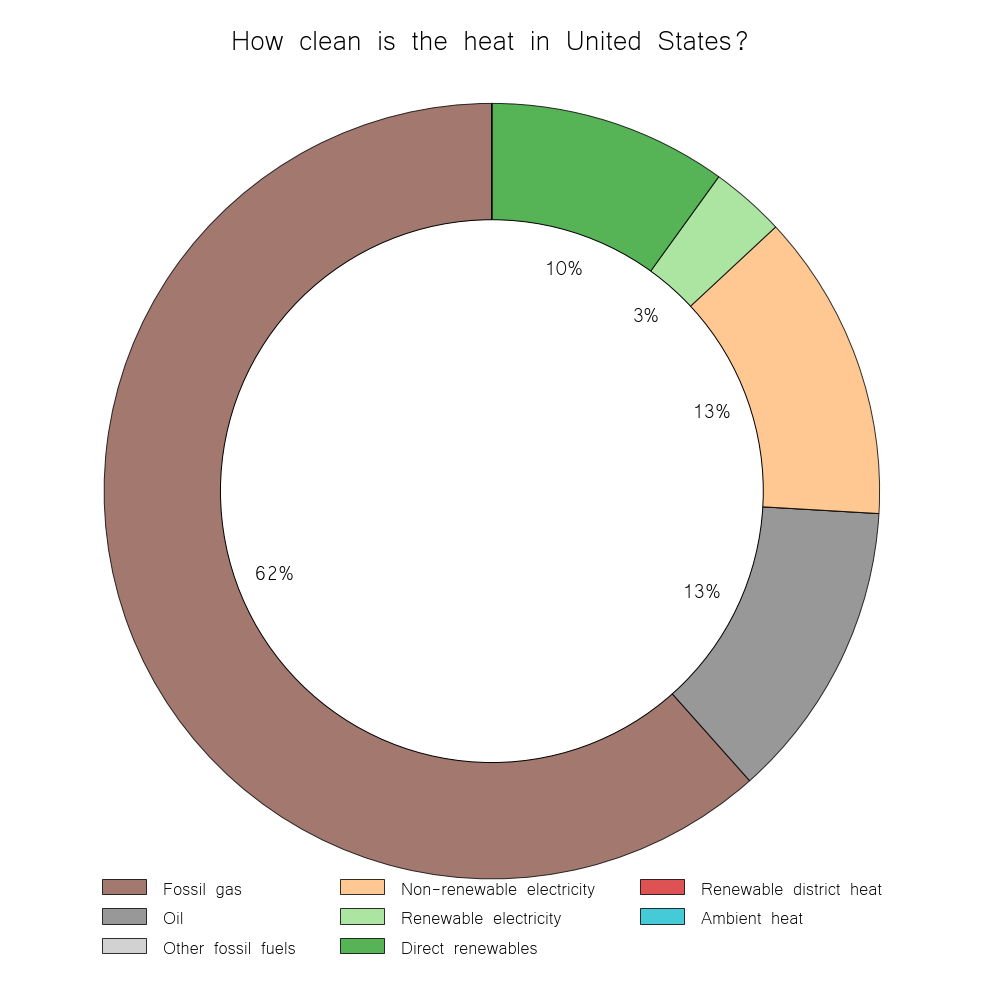

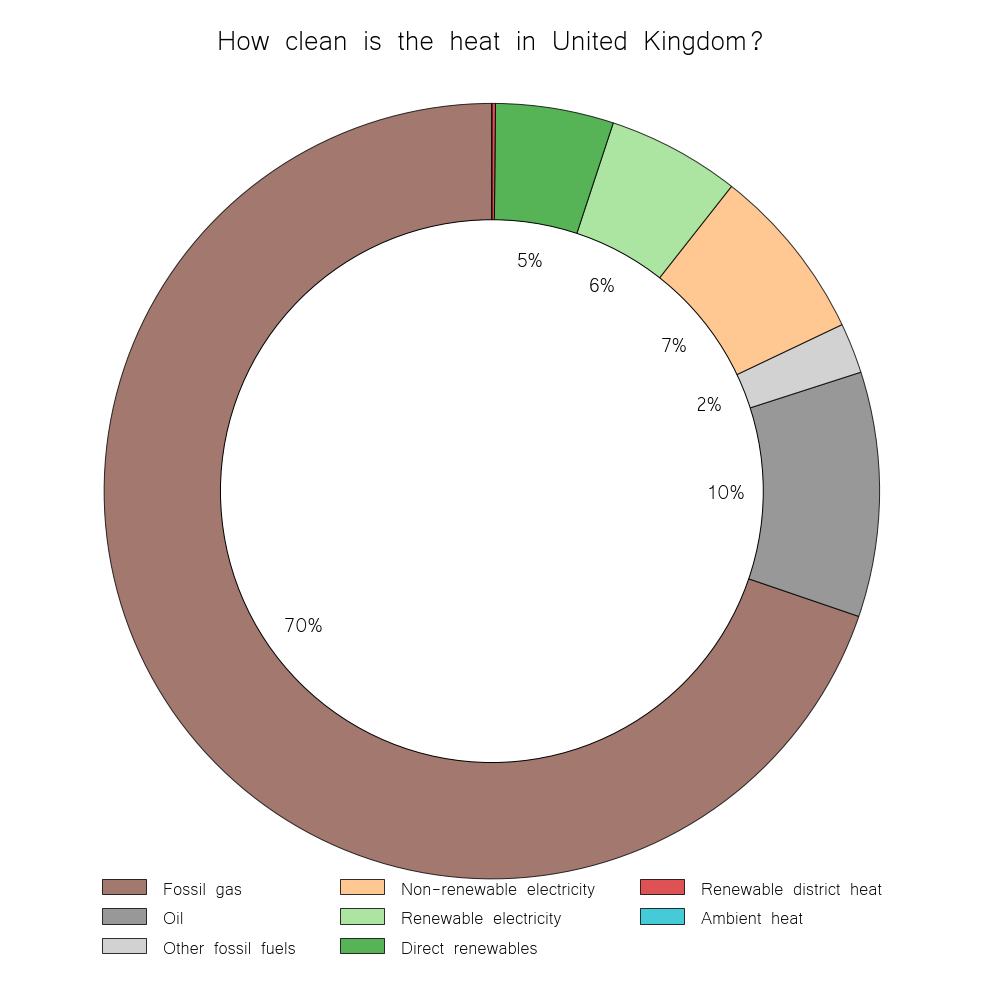

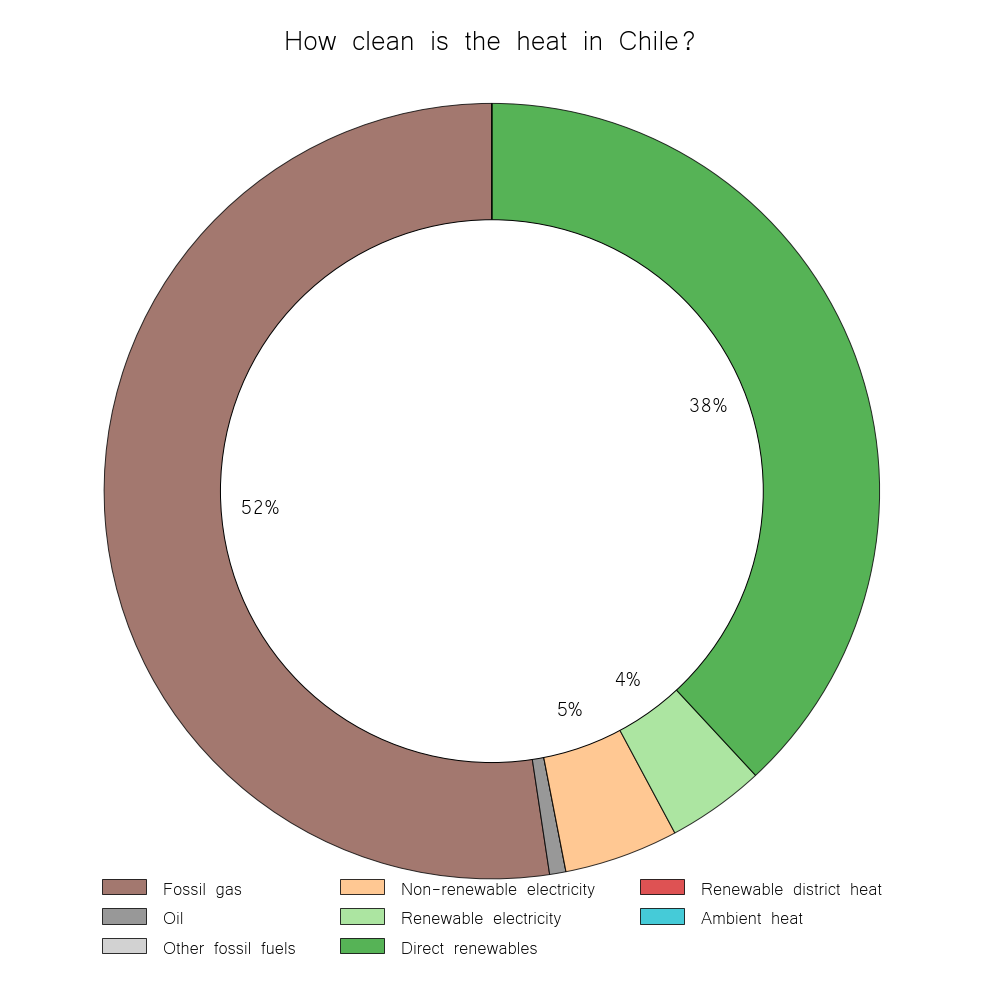

In [51]:
""" SAVING THE FIGURES """
plot_all_figs()

### EMISSIONS

In [ ]:
labels = df_co2.columns[:2][::-1]
labels_test = df_co2.columns
labels_test

In [ ]:
def check_note(country):
    note_text = df_co2.loc[country]["Note"]
    if not pd.isna(note_text):
        plt.text(0.03, 0, f'Note: {note_text}', fontsize=15, fontfamily=font, color='black', wrap=True, rotation=90)

def plot_emissions(country):
    row = df_co2.loc[country]
    pd.DataFrame(row[0:2]).T.plot(kind="bar", stacked=True, figsize=(10,10), color=colors_e, width=0.05, legend=False, alpha=0.7, edgecolor='black')
    plt.axis('off')
    plt.legend(handles = reversed(plt.legend().legendHandles), labels = reversed(labels_test[0:2]), bbox_to_anchor=(0.73, 0.95), prop=legend_bar_props, loc = 9, ncol=1, framealpha=0)
    plt.title(f"Emissions in {country}", fontdict=title_props, x=0.7, y=1)
    share = row["Heat in Buildings"]*100
    plt.text(0.03, share/100/2, f'{share}%', fontsize=35, fontfamily=font, color='black')
    #check_note(country)
    plt.tight_layout()
    plt.savefig(f"{FILEPATH}/{country}_emissions")
    plt.show()

In [ ]:
#plot_emissions('Denmark')

for country in df_co2.index:
   plot_emissions(country)

### STACKED BAR CHART

In [ ]:
def normalize(df):
    tot = df.sum(axis=1)
    for col in df:
        df[col] /= tot
    return df

df_1_share = normalize(df_1)
df_2_share = normalize(df_2)

df_2_share

In [ ]:
order_1 = ["Scotland", "United Kingdom", "Canada", "United States", "Chile", "Germany", "France", "Denmark"] # most gas
order_2 = ["Denmark", "Chile", "France", "Germany", "Canada", "Scotland", "United States", "United Kingdom"] # highest RE share

df_1_share = df_1_share.reindex(order_1)
df_1_co2 = df_co2.reindex(order_1)
labels_1 = df_1_share.columns

df_2_share = df_2_share.reindex(order_2)
df_2_co2 = df_co2.reindex(order_2)
labels_2 = df_2_share.columns

In [ ]:
share_pct = round((df_2_share["Renewable electricity"] + df_2_share["Direct renewables"] + df_2_share["Renewable district heat"] + df_2_share["Ambient heat"])*100,1).to_list()
share_dec = (df_2_share["Renewable electricity"] + df_2_share["Direct renewables"] + df_2_share["Renewable district heat"] + df_2_share["Ambient heat"]).to_list()


In [ ]:
emissions_1_pct = round(df_1_co2["Heat in Buildings"]*100,1).to_list()
emissions_2_pct = round(df_2_co2["Heat in Buildings"]*100,1).to_list()


In [ ]:
plot_share_1 = [df_1_share, emissions_1_pct, colors_1, labels_1, "What fuels are used to heat?", "fig_1"]
plot_share_2 = [df_2_share, emissions_2_pct, colors_2, labels_2, "How clean is the heat?", "fig_2"]

In [ ]:
def plot_bars(df, emissions_pct, colors, labels, title, name):
    df.plot(kind='bar', stacked=True, figsize=(bar_size), color=colors, width=0.3, zorder=0, alpha=alpha_set, edgecolor='black')
    plt.text(text_offset, -0.15, 'Building heat share of emissions', fontsize=25, fontfamily=font, color='#8c564b')
    start = -0.15
    for e in emissions_pct:
        plt.text(start, -0.15, f'{e}%', fontsize=25, fontfamily=font, color='#8c564b')
        start += 1
    if name == 'fig_2':
        plt.text(text_offset, 1.02, 'Share of renewables', fontsize=25, fontfamily=font, color='#2ca02c')
        start = -0.15
        for share in share_pct:
            plt.text(start, 1.02, f'{share}%', fontsize=25, fontfamily=font, color='#2ca02c')
            start += 1
        
        
        
        dots = plt.scatter(x=df_2_share.index.to_list(), y=share_dec, zorder=10, s = 250, color='#2ca02c', edgecolors='black')



    plt.legend(handles = reversed(plt.legend().legendHandles), labels = reversed(labels), bbox_to_anchor=(1.15, 0.5), prop=legend_bar_props, loc = 9, ncol=1, framealpha=0)
    plt.grid(alpha=0.4, axis='y', zorder=5)
    plt.title(title, fontdict=title_props, y =1.08)
    plt.xlabel(xlabel='', fontdict=text_props, labelpad=20)
    plt.xticks(rotation=20, fontfamily=font, fontsize=bar_font-2)
    plt.ylabel('Share', fontfamily=font, fontsize=bar_font)
    plt.yticks(fontfamily=font, fontsize=bar_font)
    plt.margins(y=0)
    plt.tight_layout()
    plt.savefig(f"{FILEPATH}/all_countries_{name}")
    plt.show()

In [ ]:
plot_bars(*plot_share_1)

In [ ]:
plot_bars(*plot_share_2)

In [ ]:
def plot_emissions(country, df, colors, labels, title, name):
    fig = plt.figure(figsize = pie_size)
    plt.pie(df.loc[country], colors=colors, startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', textprops=text_props, 
    wedgeprops={'alpha':alpha_set, "edgecolor":"black", 'antialiased':True})
    plt.title(title+f"{country}?", fontdict=title_props, y=0.95)
    plt.legend(labels=labels, prop=legend_pie_props, loc = 8, ncol=3, edgecolor='white', framealpha=0)
    centre_circle = plt.Circle((0,0),0.70,fc=face_color)
    ax = fig.gca()
    ax.add_artist(centre_circle)


    """ PLOTTING THE EMISSIONS """
    ax = fig.subplots()
    ax.axis('off')
    emissions = pd.DataFrame(df_co2.loc[country]).T
    emissions.plot(kind='bar', stacked=True, ax=ax, color=colors_e, legend=False, alpha=0.7, edgecolor='black')
    ax.set_position([0.5, 0.1, 0, 0.1])
    #check_note(country)

    plt.tight_layout()
    #plt.savefig(f"Exported/{country}_{name}")
    plt.show()

#plot_country("Scotland", *plot_1)